In [26]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import json
import requests
import time
from citipy import citipy
from resources import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [51]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(lats)

[-40.61413074   9.90620696  67.53262755 ...  57.15462629  80.55910459
 -11.93552926]


In [28]:
# cities = ["Paris", "London", "Oslo", "Beijing"]

In [29]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key + "&q="
response = requests.get(query_url + city + "&units=" + "imperial").json()

#test output to see API structure
#API day 3, activity 4
# test_url = query_url + "London"
# print(test_url)

http://api.openweathermap.org/data/2.5/weather?appid=c745838b608b3e584a01c772f2c9bae4&q=London


In [30]:
#Perform a weather check on each of the cities using a series of successive API calls.
#API Unit Day 2, Activity 5

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city + "&units=" + "imperial").json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humid.append(response["main"]['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

In [31]:
# create a data frame from cities, lat, and lon
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,humidity,cloudiness,wind speed
0,Paris,48.85,2.35,73.98,49,88,1.99
1,London,51.51,-0.13,68.99,61,43,1.01
2,Oslo,59.91,10.75,61.54,42,70,2.75
3,Beijing,39.91,116.40,78.08,79,59,6.06


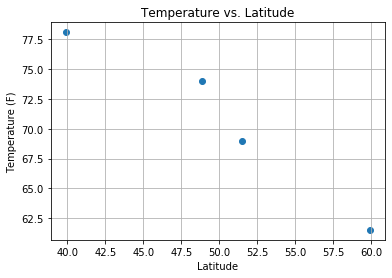

In [32]:
# Build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

In [33]:
#observations

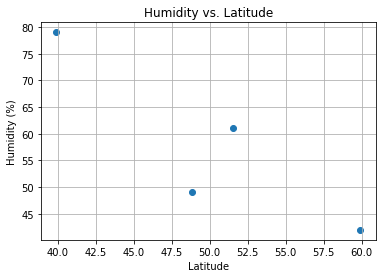

In [34]:
# Build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLat.png")

In [35]:
#observations

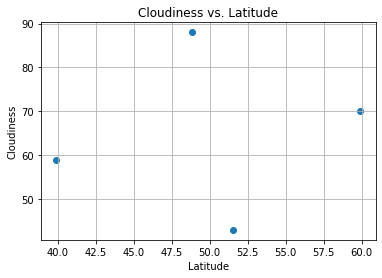

In [36]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLat.png")

In [37]:
#observations

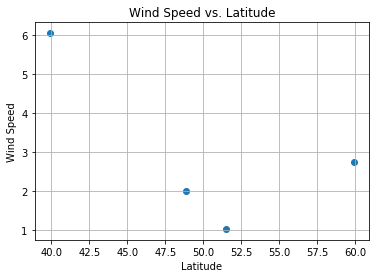

In [38]:
# Build a scatter plot for Wind Speed vs. Latitude
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

In [39]:
#observations

In [52]:
#Run linear regression on each relationship, only this time separating them into Northern Hemisphere 
#(greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
#Matplotlib Unit Day 3, Activity 8
# Northern Hemisphere - Temperature (F) vs. Latitude
#restrict data frame
weather_data_north = weather_data.loc[weather_data["lat"] >= 0]

#build scatter plot
plt.scatter(weather_data_north["lat"], weather_data_north["temp"], marker="o")

#add linear regression (make var names unique)
x_values = weather_data_north['lat']
y_values = weather_data_north['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show

# Save the figure
plt.savefig("TempVsLatRegress.png")

,city,lat,lon,temp,humidity,cloudiness,wind speed
0,Paris,48.85,2.35,73.98,49,88,1.99
1,London,51.51,-0.13,68.99,61,43,1.01
2,Oslo,59.91,10.75,61.54,42,70,2.75
3,Beijing,39.91,116.40,78.08,79,59,6.06


In [41]:
# Southern Hemisphere - Temperature (F) vs. Latitude

In [42]:
# Northern Hemisphere - Humidity (%) vs. Latitude

In [43]:
# Southern Hemisphere - Humidity (%) vs. Latitude

In [44]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

In [45]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

In [46]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [47]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude